<a href="https://colab.research.google.com/github/the-faisalahmed/Optimization/blob/main/Price_of_a_Turkey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
import sys
import os

if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

!pip install pyomo
from pyomo.environ import *
from pyomo.opt import SolverFactory
from pyomo.util.infeasible import log_infeasible_constraints
from pyomo.opt import SolverStatus
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from pyomo.contrib.latex_printer import latex_printer


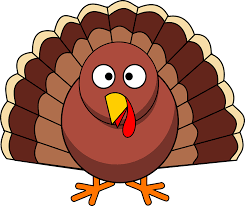

[Link](https://matmod.ch/blog/2024/02/04/price-of-a-turkey-math13/) to the original problem.

A butcher received an invoice for a consignment of 72 turkeys, but unfortunately it was smudged and a couple of figures were unreadable. All he could read was ’?67.9?’, with the first and last figures illegible. Nevertheless, being a “puzzler”, he was able to work out the price of a turkey immediately. What was the price of one turkey?

In [ ]:
model = ConcreteModel()

model.X = Var(bounds = (1,9), within = NonNegativeIntegers)
model.Y = Var(bounds = (1,9), within = NonNegativeIntegers)
model.Z = Var(within = NonNegativeReals)

model.con1 = Constraint(expr = model.X*100 + 67.9 + model.Y/100 == model.Z*72)

In [ ]:
# Solve model
opt = SolverFactory('bonmin')
result = opt.solve(model)

if (result.solver.status == SolverStatus.ok) and \
    (result.solver.termination_condition == TerminationCondition.optimal):
    # Do something when the solution in optimal and feasible
    print('Solution is Optimal')
elif (result.solver.termination_condition == TerminationCondition.infeasible):
    # Do something when model in infeasible
    print('Solution is Infeasible')
else:
        # Something else is wrong
    print("Solver Status:",  result.solver.status)

# Solve time
print('Solve Time: ', result.solver.wallclock_time)

Solution is Optimal
Solve Time:  <undefined>


In [ ]:
print("The price per turkey (Z) is {0} \nX = {1}, Y = {2} \nthe final price is {3}." \
      .format(value(model.Z),value(model.X),value(model.Y),value(model.Z*72)))

The price per turkey is 2.3320833333333324 
X = 1.0, Y = 1.0 
the final price is 167.90999999999994.
